# Logistic Regression algorithm

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 載入 Iris 資料集
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 設定目標變數 (y) 為兩類 (0 或 1)，這裡只選擇 'setosa' 和 'versicolor'
# 這會將 Iris 資料集中的三個類別 (setosa, versicolor, virginica) 中的兩個類別篩選出來
df['target'] = iris.target
df = df[df['target'] != 2]  # 只保留 'setosa' 和 'versicolor'

# 定義 X 和 y
X = df[['sepal length (cm)', 'sepal width (cm)']]  # 使用花萼長和花萼寬作為特徵
y = df['target']  # 目標變數為 'target'

# 將特徵數據標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 將數據集分割為訓練集和測試集 (75% 訓練集，25% 測試集)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=27)

# 創建並訓練邏輯回歸模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 預測測試集的結果
y_pred = logreg.predict(X_test)

# 輸出預測的類別
print('Predicted classes:', y_pred)

# 輸出測試集的真實類別
print('True classes:', y_test.values)

Predicted classes: [1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1]
True classes: [1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1]


[[ 9  0]
 [ 0 16]]


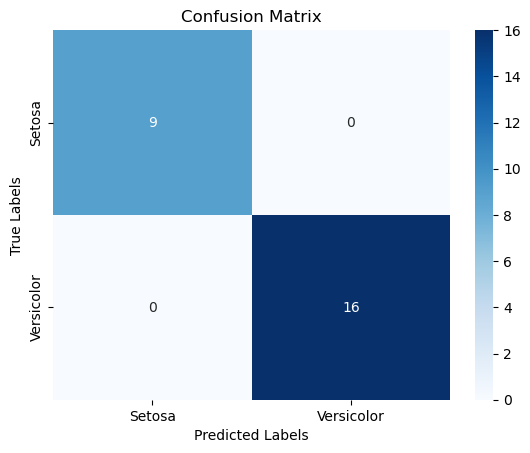

In [2]:
from sklearn.metrics import confusion_matrix

# 輸出混淆矩陣
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 顯混淆矩陣
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor'], yticklabels=['Setosa', 'Versicolor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# accuracy: 計算預測結果的準確度，即正確分類的比例
print(accuracy_score(y_test, y_pred))
# 計算準確度，輸出預測正確的樣本比例

# precision: 計算精確度，即正確預測為正類的樣本佔所有預測為正類的比例
print(precision_score(y_test, y_pred))
# 精確度 = TP / (TP + FP)
# TP: 真陽性，FP: 假陽性，TP / (TP + FP) 表示模型預測為正類時，實際正類的比例

# recall: 計算召回率，即正確預測為正類的樣本佔所有實際正類樣本的比例
print(recall_score(y_test, y_pred))
# 召回率 = TP / (TP + FN)
# TP: 真陽性，FN: 假陰性，TP / (TP + FN) 表示實際正類的樣本中，有多少被模型正確識別為正類

# F1 score: 計算精確度和召回率的加權調和平均數，是一個綜合指標
print(f1_score(y_test, y_pred))
# F1 分數 = 2 * (precision * recall) / (precision + recall)
# F1 分數用來平衡精確度和召回率，當精確度和召回率不平衡時，F1 分數可以更好地評價模型的整體表現

1.0
1.0
1.0
1.0


In [4]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年11月30日
